In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import math 

In [2]:
data = pd.read_csv('normalize.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
data.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
del data['Loan_ID']
data.dropna(axis=0, subset=['Credit_History'], inplace=True)
data.dropna(axis=0, subset=['Gender'], inplace=True)
data.dropna(axis=0, subset=['Married'], inplace=True)
data.dropna(axis=0, subset=['Self_Employed'], inplace=True)
data.dropna(axis=0, subset=['Dependents'], inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Calculate the mean
mean_value = data['LoanAmount'].mean()
mean_value2 = data['Loan_Amount_Term'].mean()
# Replace NaN value
data['LoanAmount'].fillna(mean_value, inplace=True)
data['Loan_Amount_Term'].fillna(mean_value2,inplace=True)


C:\Users\LAB 102 PC 14\AppData\Local\Temp\ipykernel_2252\524774491.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(mean_value, inplace=True)
C:\Users\LAB 102 PC 14\AppData\Local\Temp\ipykernel_2252\524774491.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [8]:
data.shape

(511, 12)

In [9]:
# separate Numerical and categorical variables 
data_num=data.select_dtypes(include=['int64','float64'])
data_cat=data.select_dtypes(include=['object'])

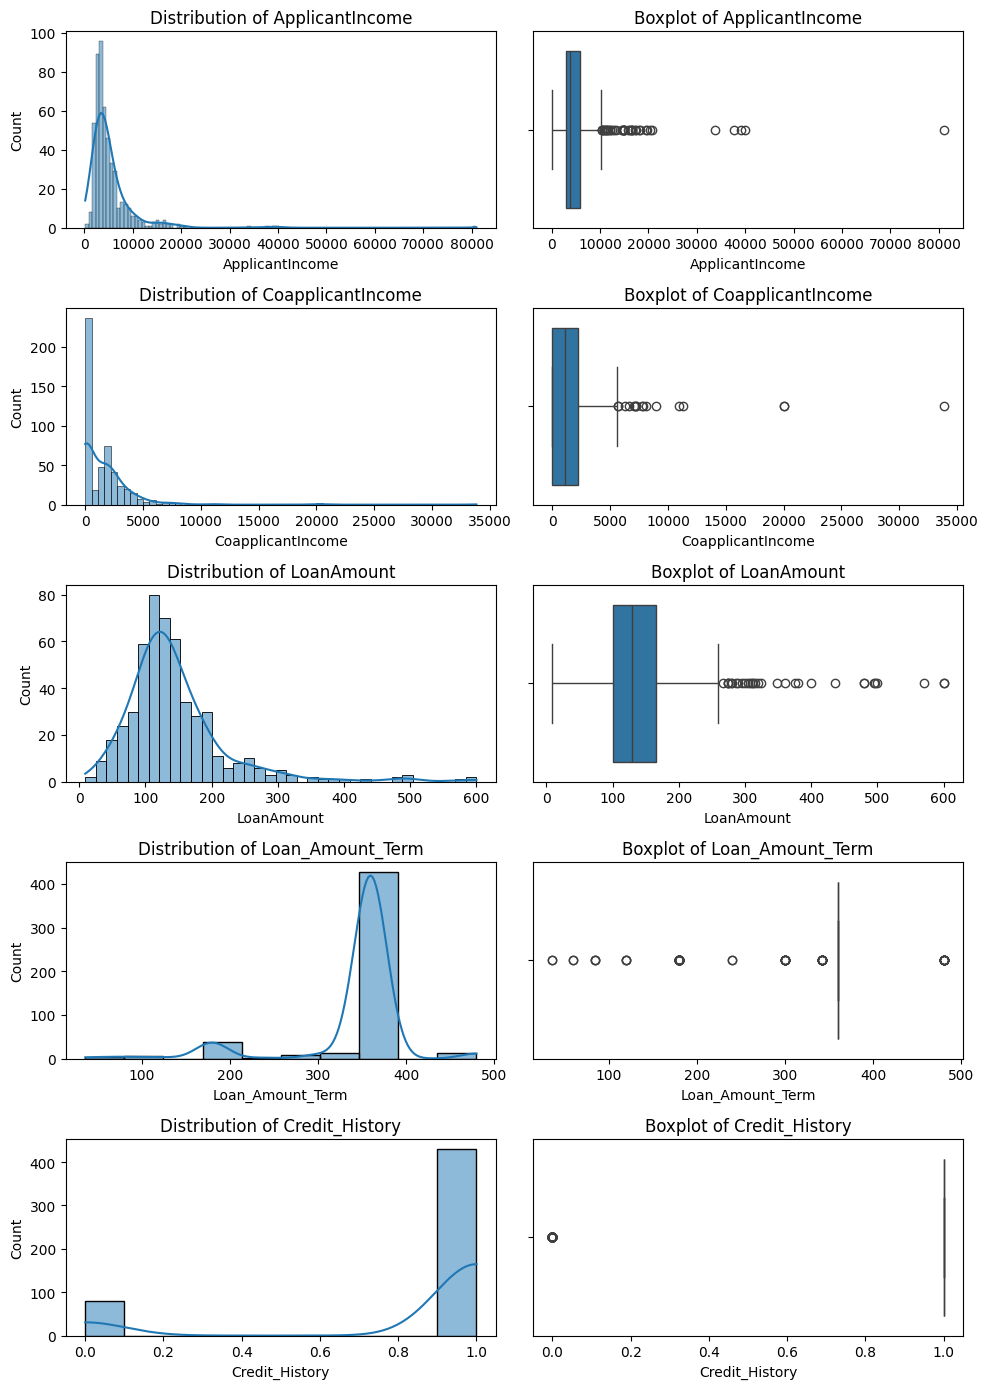

In [10]:
import seaborn as sns

num_columns = len(data_num.columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 2.8 * num_columns))

for i, column in enumerate(data_num.columns):
    sns.histplot(data_num[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')

    sns.boxplot(x=data_num[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

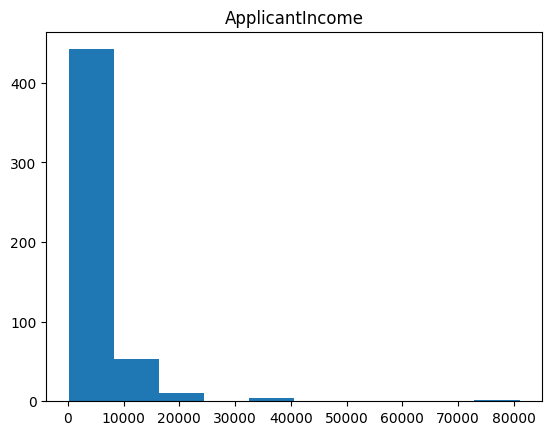

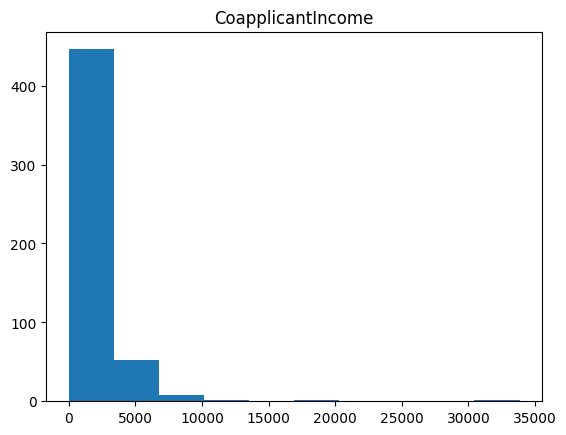

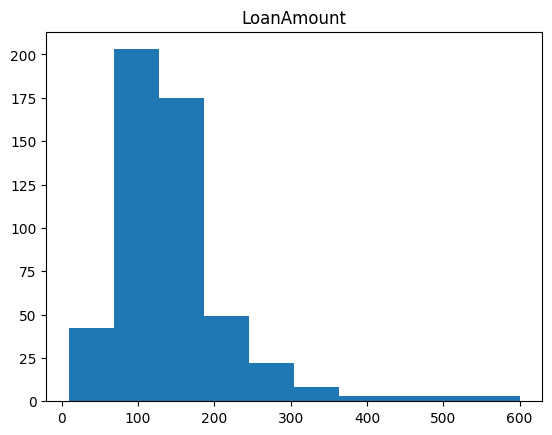

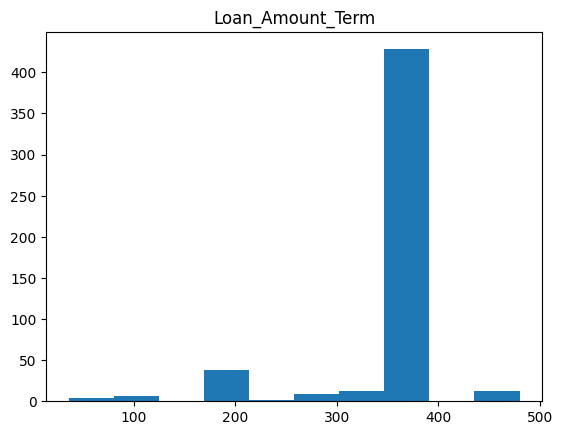

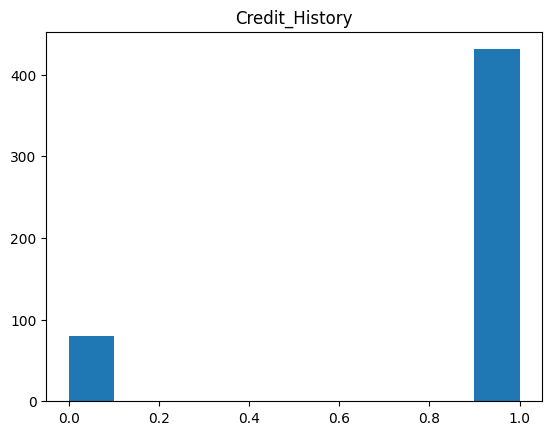

In [11]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

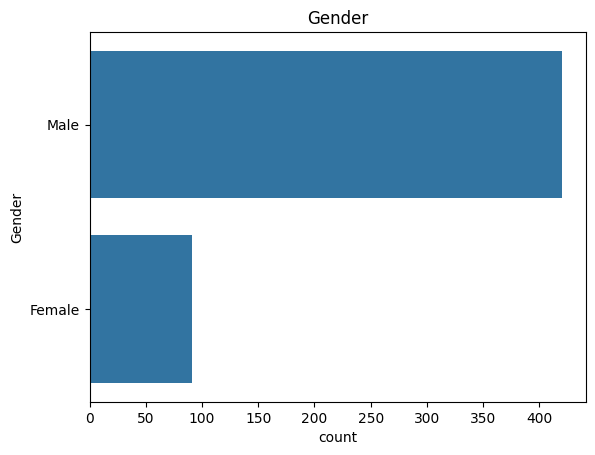

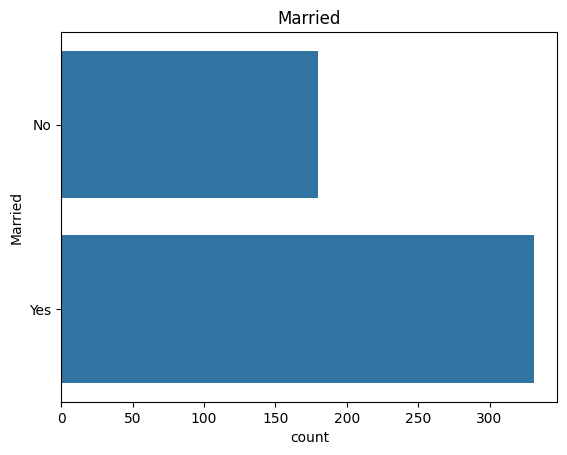

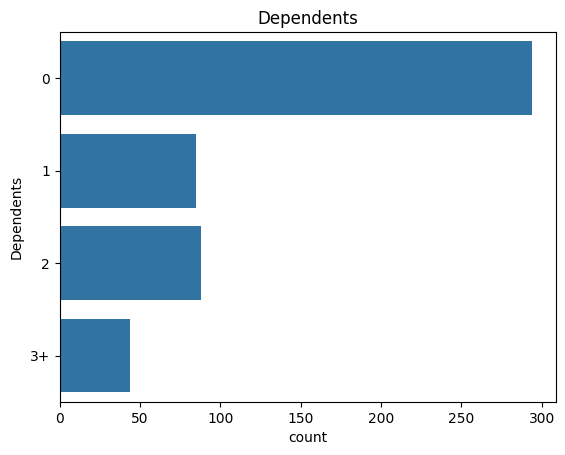

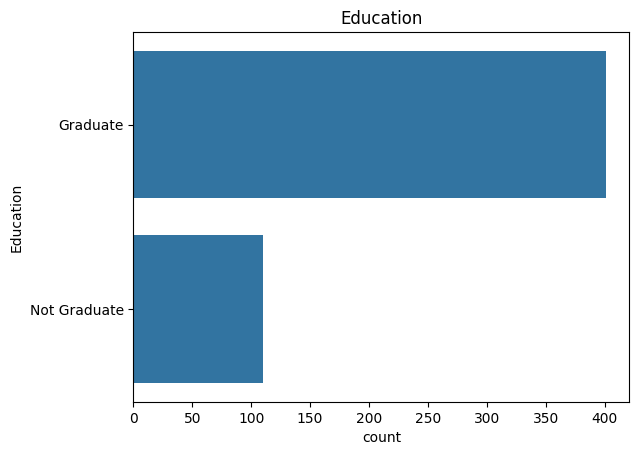

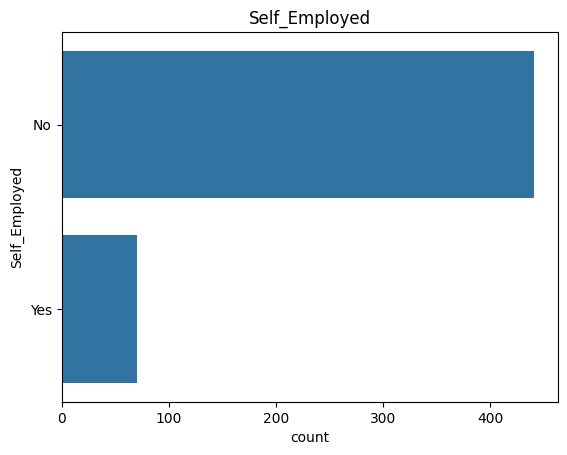

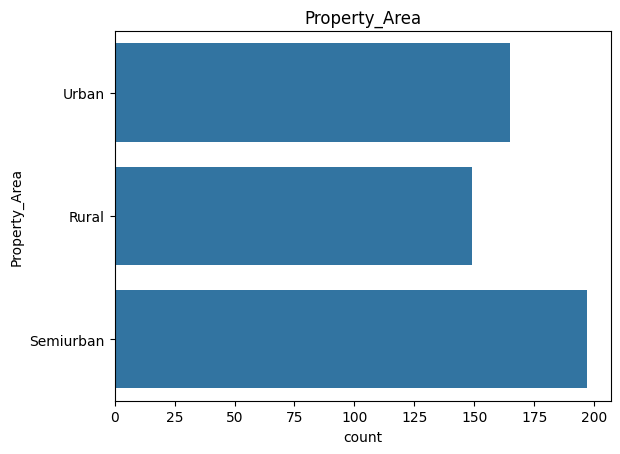

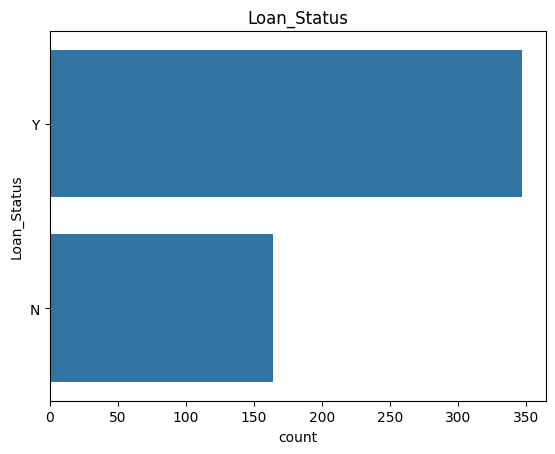

In [37]:
# visualizing categorical variables
for i in data_cat.columns:
    sns.countplot(data_cat[i])
    plt.title(i)
    plt.show()

Normalization

In [34]:
def z_score_normalize(data, columns):
    for col in columns:
        # (X - mean) / std
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    return data
columns_to_normalize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data_num_normalized = z_score_normalize(data_num, columns_to_normalize)
print(data_num_normalized)


     ApplicantIncome  CoapplicantIncome    LoanAmount  Loan_Amount_Term  \
0           0.097255          -0.610302 -1.093812e-16          0.280655   
1          -0.130394          -0.021098 -2.061733e-01          0.280655   
2          -0.415044          -0.610302 -9.983523e-01          0.280655   
3          -0.490028           0.311013 -3.083899e-01          0.280655   
4           0.124407          -0.610302 -4.007121e-02          0.280655   
..               ...                ...           ...               ...   
609        -0.433026          -0.610302 -9.344669e-01          0.280655   
610        -0.216166          -0.610302 -1.330556e+00         -2.527774   
611         0.496988          -0.516530  1.390962e+00          0.280655   
612         0.409057          -0.610302  5.476745e-01          0.280655   
613        -0.130394          -0.610302 -1.422879e-01          0.280655   

     Credit_History  
0          0.430409  
1          0.430409  
2          0.430409  
3          

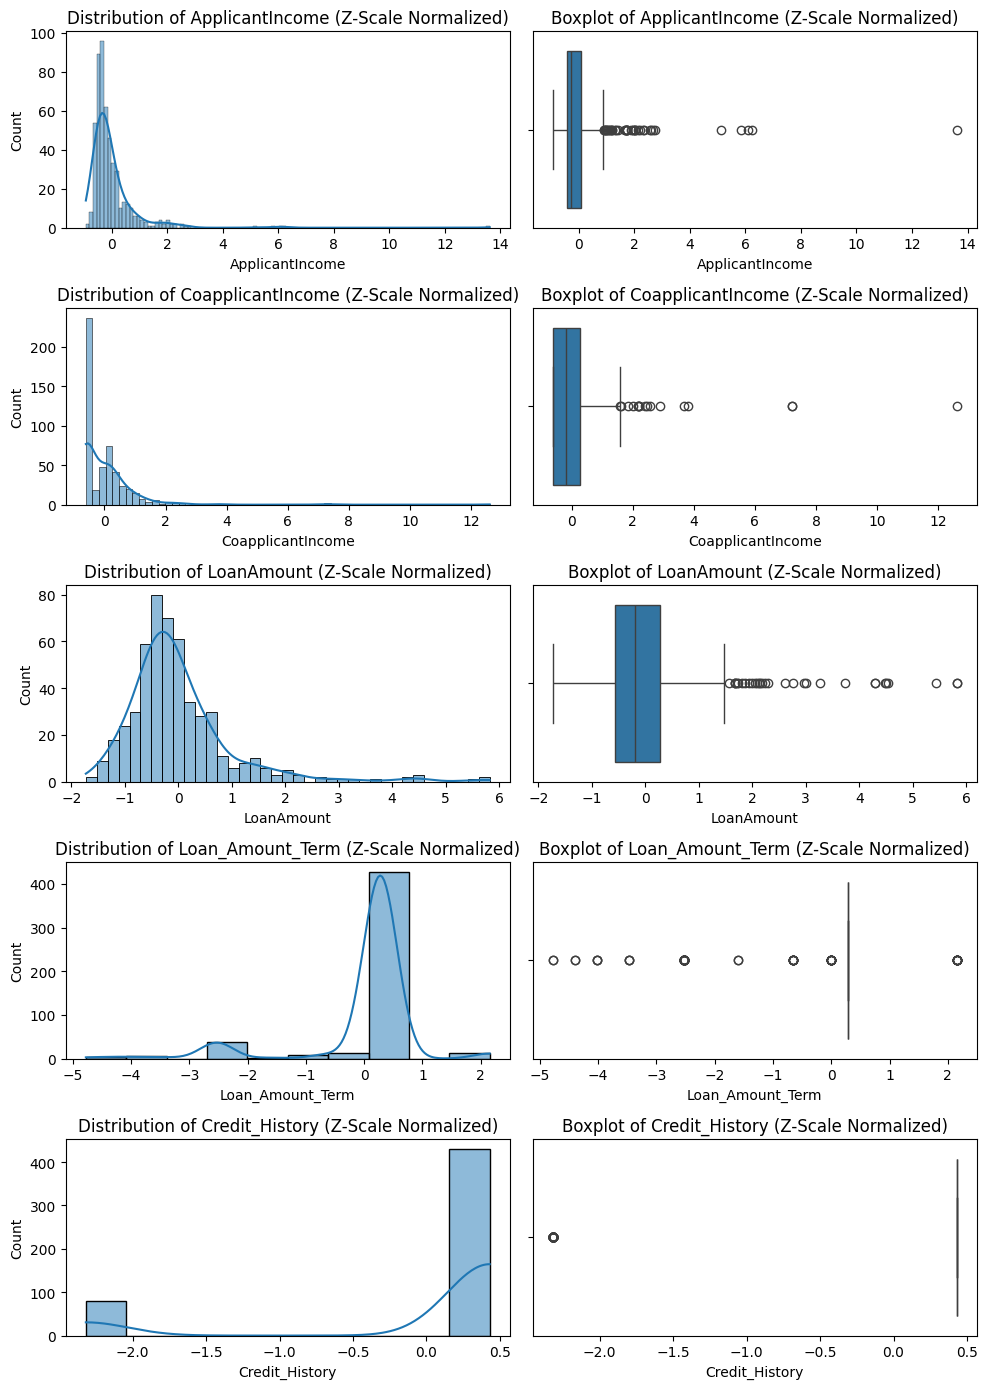

In [35]:
num_columns = len(data_num_normalized.columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 2.8 * num_columns))

for i, column in enumerate(data_num_normalized.columns):
    sns.histplot(data_num_normalized[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} (Z-Scale Normalized)')

    sns.boxplot(x=data_num_normalized[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column} (Z-Scale Normalized)')
plt.tight_layout()
plt.show()

In [14]:
def min_max_normalize(data, columns):
    for col in columns:
        col_min = data[col].min()
        col_max = data[col].max()
        # (X - min) / (max - min)
        data[col] = (data[col] - col_min) / (col_max - col_min)
    return data
columns_to_normalize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data_num_normalized = min_max_normalize(data_num.copy(), columns_to_normalize)
print(data_num_normalized)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.228657          0.729730   
1           0.054830           0.044567    0.201354          0.729730   
2           0.035250           0.000000    0.096447          0.729730   
3           0.030093           0.069687    0.187817          0.729730   
4           0.072356           0.000000    0.223350          0.729730   
..               ...                ...         ...               ...   
609         0.034014           0.000000    0.104907          0.729730   
610         0.048930           0.000000    0.052453          0.324324   
611         0.097984           0.007093    0.412860          0.729730   
612         0.091936           0.000000    0.301184          0.729730   
613         0.054830           0.000000    0.209814          0.729730   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4            

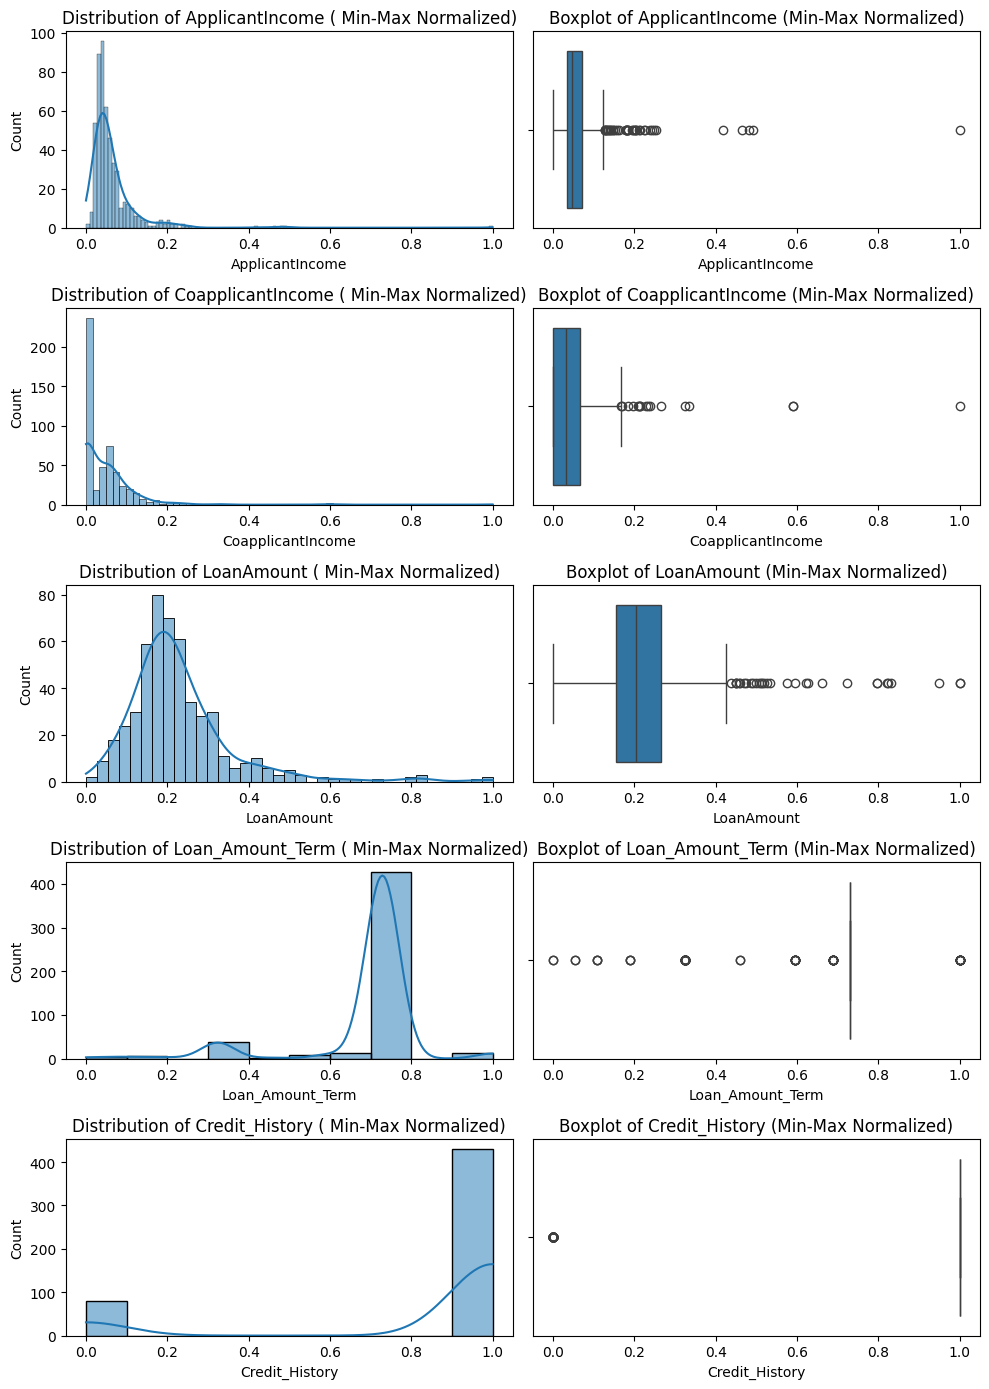

In [15]:
num_columns = len(data_num_normalized.columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 2.8 * num_columns))

for i, column in enumerate(data_num_normalized.columns):
    sns.histplot(data_num_normalized[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} ( Min-Max Normalized)')

    sns.boxplot(x=data_num_normalized[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column} (Min-Max Normalized)')
plt.tight_layout()
plt.show()

In [16]:
def max_absolute_normalize(data, columns):
    for col in columns:
        col_max_abs = data[col].abs().max()
        # X / max(abs(X))
        data[col] = data[col] / col_max_abs
    return data
columns_to_normalize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data_num_normalized = max_absolute_normalize(data_num.copy(), columns_to_normalize)
print(data_num_normalized)


     ApplicantIncome  CoapplicantIncome    LoanAmount  Loan_Amount_Term  \
0           0.007145          -0.048397 -6.234693e-17          0.058782   
1          -0.009580          -0.001673 -3.539693e-02          0.058782   
2          -0.030494          -0.048397 -1.714025e-01          0.058782   
3          -0.036003           0.024663 -5.294603e-02          0.058782   
4           0.009140          -0.048397 -6.879640e-03          0.058782   
..               ...                ...           ...               ...   
609        -0.031815          -0.048397 -1.604343e-01          0.058782   
610        -0.015882          -0.048397 -2.284370e-01         -0.529430   
611         0.036515          -0.040960  2.388078e-01          0.058782   
612         0.030054          -0.048397  9.402769e-02          0.058782   
613        -0.009580          -0.048397 -2.442874e-02          0.058782   

     Credit_History  
0          0.185615  
1          0.185615  
2          0.185615  
3          

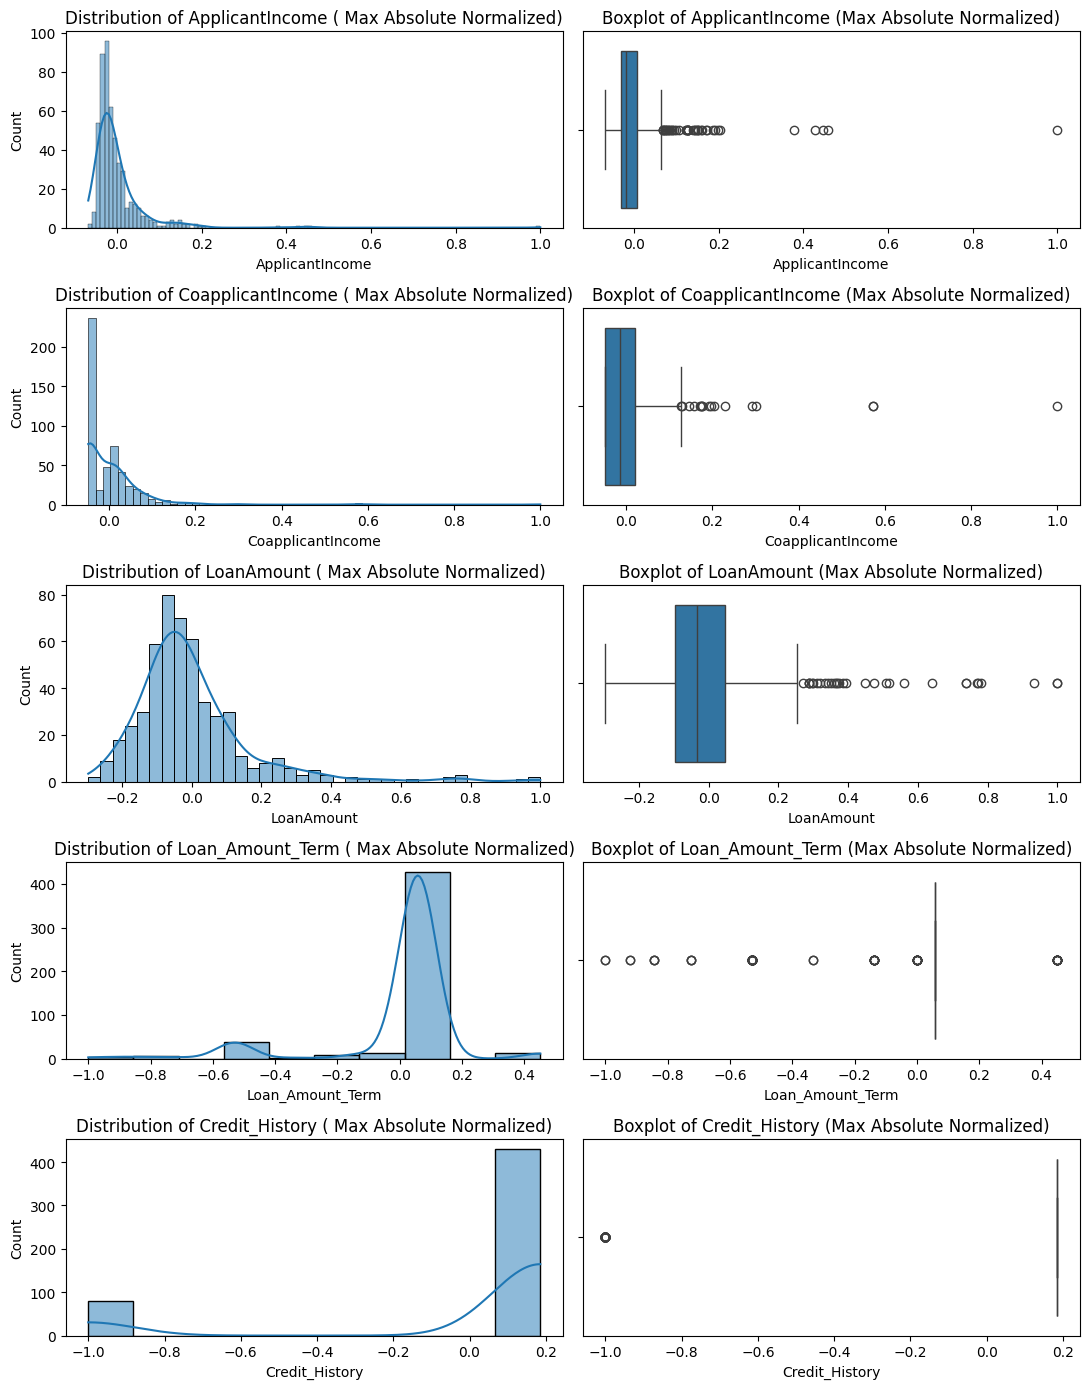

In [23]:
num_columns = len(data_num_normalized.columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(11, 2.8 * num_columns))

for i, column in enumerate(data_num_normalized.columns):
    sns.histplot(data_num_normalized[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} ( Max Absolute Normalized)')

    sns.boxplot(x=data_num_normalized[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column} (Max Absolute Normalized)')
plt.tight_layout()
plt.show()

In [24]:
def robust_scale(data, columns):
    for col in columns:
        col_median = data[col].median()
        col_iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
        # (X - median) / IQR
        data[col] = (data[col] - col_median) / col_iqr
    return data
columns_to_normalize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data_num_normalized = robust_scale(data_num.copy(), columns_to_normalize)
print(data_num_normalized)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.678480          -0.481917    0.231087               NaN   
1           0.247061           0.187264   -0.015267               NaN   
2          -0.292384          -0.481917   -0.961832               NaN   
3          -0.434486           0.564455   -0.137405               NaN   
4           0.729937          -0.481917    0.183206               NaN   
..               ...                ...         ...               ...   
609        -0.326461          -0.481917   -0.885496               NaN   
610         0.084512          -0.481917   -1.358779              -inf   
611         1.436020          -0.375416    1.893130               NaN   
612         1.269381          -0.481917    0.885496               NaN   
613         0.247061          -0.481917    0.061069               NaN   

     Credit_History  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4            

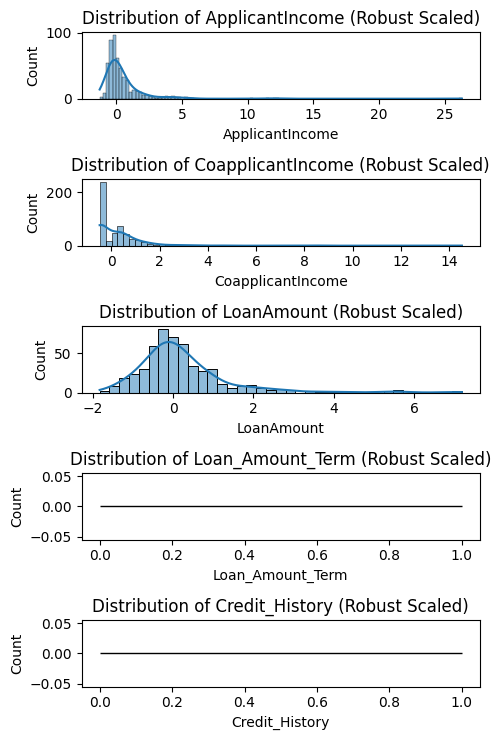

In [31]:
num_columns = len(data_num_normalized.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(5, 1.5 * num_columns))
for i, column in enumerate(data_num_normalized.columns):
    sns.histplot(data_num_normalized[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} (Robust Scaled)')
plt.tight_layout()
plt.show()

In [32]:
def mean_normalize(data, columns):
    for col in columns:
        col_mean = data[col].mean()
        col_min = data[col].min()
        col_max = data[col].max()
        # (X - mean) / (max - min)
        data[col] = (data[col] - col_mean) / (col_max - col_min)
    return data
columns_to_normalize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data_num_normalized = mean_normalize(data_num.copy(), columns_to_normalize)
print(data_num_normalized)


     ApplicantIncome  CoapplicantIncome    LoanAmount  Loan_Amount_Term  \
0           0.006690          -0.046162 -1.448517e-17          0.040513   
1          -0.008969          -0.001596 -2.730318e-02          0.040513   
2          -0.028549          -0.046162 -1.322101e-01          0.040513   
3          -0.033706           0.023525 -4.083956e-02          0.040513   
4           0.008557          -0.046162 -5.306563e-03          0.040513   
..               ...                ...           ...               ...   
609        -0.029785          -0.046162 -1.237499e-01          0.040513   
610        -0.014869          -0.046162 -1.762033e-01         -0.364892   
611         0.034185          -0.039070  1.842027e-01          0.040513   
612         0.028137          -0.046162  7.252762e-02          0.040513   
613        -0.008969          -0.046162 -1.884294e-02          0.040513   

     Credit_History  
0          0.156556  
1          0.156556  
2          0.156556  
3          

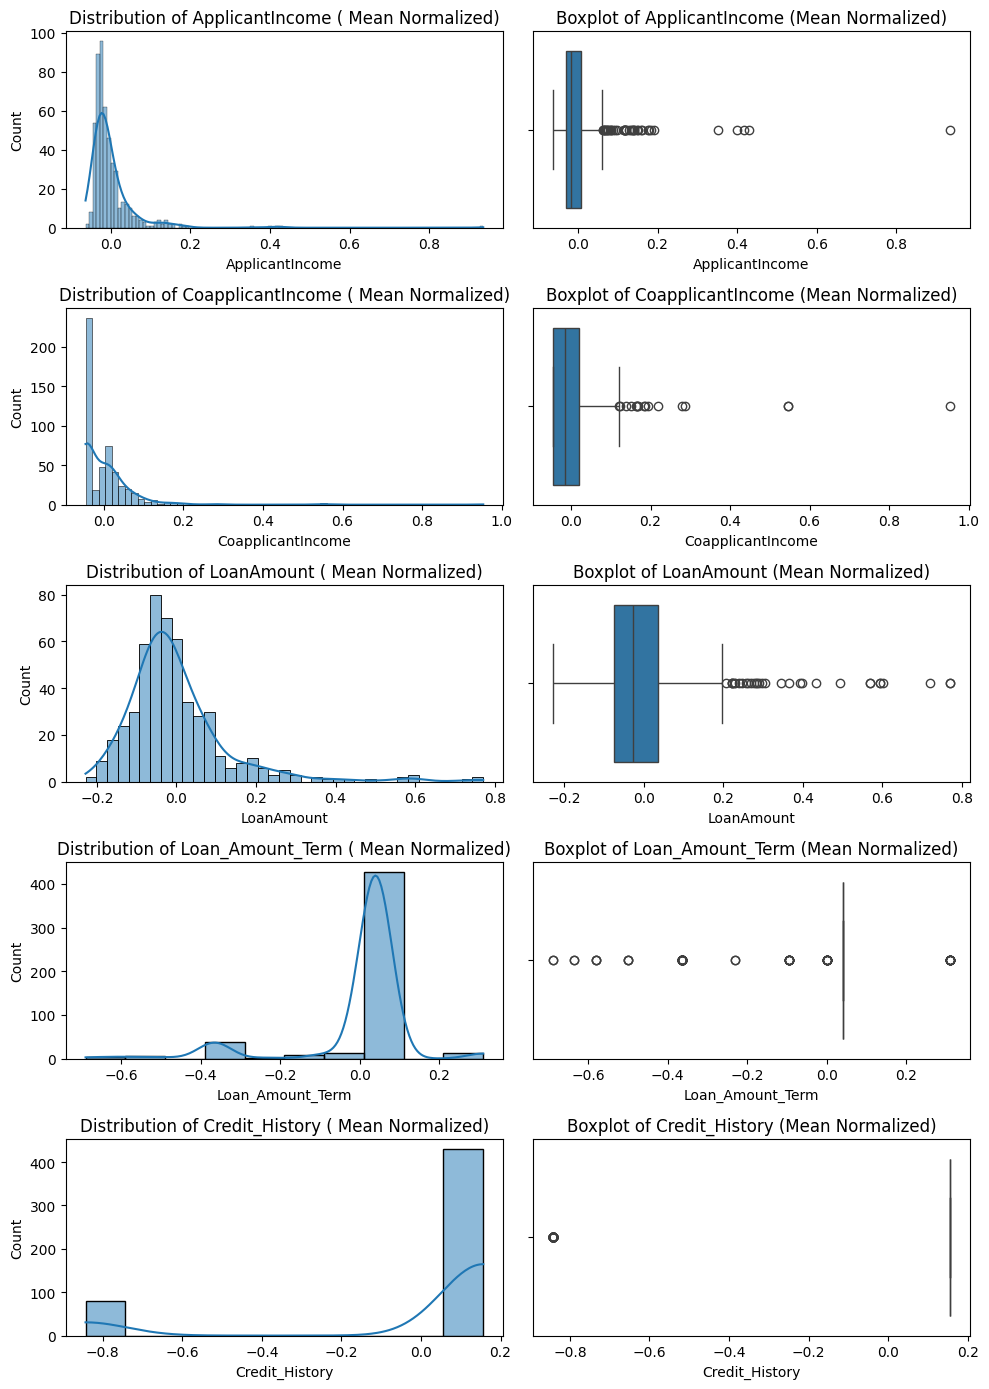

In [33]:
num_columns = len(data_num_normalized.columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 2.8 * num_columns))

for i, column in enumerate(data_num_normalized.columns):
    sns.histplot(data_num_normalized[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column} ( Mean Normalized)')

    sns.boxplot(x=data_num_normalized[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column} (Mean Normalized)')
plt.tight_layout()
plt.show()